## BNS merger & PM fits Notebook
In this Notebook:
- Fits for $L_{\rm peak}$, $A^{\rm mrg}_{22}/M$, $Mf^{\rm mrg}_{22}/\nu$, and the mass-rescaled peak PM frequency $Mf_2$.
- Show examples of usage of the fits.

[*Last Updated: 27.09.2022 AG*]

In [2]:
import numpy as np

def q_to_nu(q):
    return q/((1.+q)*(1.+q))

### Luminosity Peak
Fitted according to [Zappa:2019],

$L_{\rm peak}(\nu,\,\hat{S},\,\kappa^T_2) = L^{\rm BBH}_{\rm peak}\frac{1 + p_1(\nu,\,\hat{S})\kappa^T_2 + p_2(\nu,\,\hat{S}){\kappa^T_2}^2}{( 1 + [p_3(\nu,\,\hat{S})]^2\kappa^T_2 )^2}$

where $L^{\rm BBH}_{\rm peak}$ are the mass and spin dependent fits for BBH from [Keitel:2016]:

In [3]:
def bbh_UIBfits_setup(m1, m2, chi1, chi2):
    """
    Common setup function for UIB final-state and luminosity fit functions
    """
    # Vectorize the function if arrays are provided as input
    m1   = np.vectorize(float)(np.array(m1))
    m2   = np.vectorize(float)(np.array(m2))
    chi1 = np.vectorize(float)(np.array(chi1))
    chi2 = np.vectorize(float)(np.array(chi2))
    if np.any(m1<0):
      raise ValueError("m1 must not be negative")
    if np.any(m2<0):
      raise ValueError("m2 must not be negative")
    if np.any(abs(chi1)>1):
      raise ValueError("chi1 has to be in [-1, 1]")
    if np.any(abs(chi2)>1):
      raise ValueError("chi2 has to be in [-1, 1]")
    # binary masses
    m    = m1+m2
    if np.any(m<=0):
      raise ValueError("m1+m2 must be positive")
    msq  = m*m
    m1sq = m1*m1
    m2sq = m2*m2
    # symmetric mass ratio
    eta  = m1*m2/msq
    if np.any(eta>0.25):
      print( "Truncating eta from above to 0.25. This should only be necessary in some rounding corner cases, but better check your m1 and m2 inputs...")
      eta = np.minimum(eta,0.25)
    if np.any(eta<0.0):
      print("Truncating negative eta to 0.0. This should only be necessary in some rounding corner cases, but better check your m1 and m2 inputs...") 
      eta = np.maximum(eta,0.0)
    eta2 = eta*eta
    eta3 = eta2*eta
    eta4 = eta2*eta2
    # spin variables (in m = 1 units)
    S1    = chi1*m1sq/msq # spin angular momentum 1
    S2    = chi2*m2sq/msq # spin angular momentum 2
    Stot  = S1+S2         # total spin
    Shat  = (chi1*m1sq+chi2*m2sq)/(m1sq+m2sq) # effective spin, = msq*Stot/(m1sq+m2sq)
    Shat2 = Shat*Shat
    Shat3 = Shat2*Shat
    Shat4 = Shat2*Shat2
    # spin difference, assuming m1>m2
    chidiff  = chi1 - chi2
    if np.any(m2>m1): # fit assumes m1>m2
      chidiff = np.sign(m1-m2)*chidiff
    chidiff2 = chidiff*chidiff
    # typical squareroots and functions of eta
    sqrt2 = 2.**0.5
    sqrt3 = 3.**0.5
    sqrt1m4eta = (1. - 4.*eta)**0.5
    return m, eta, eta2, eta3, eta4, Stot, Shat, Shat2, Shat3, Shat4, chidiff, chidiff2, sqrt2, sqrt3, sqrt1m4eta

"""
Peak luminosity fitting formula calibrated to numerical relativity and
perturbative results from https://arxiv.org/abs/1612.09566
(c) David Keitel, Xisco Jimenez Forteza, Sascha Husa, Lionel London, Alessandro Nagar, Sebastiano Bernuzzi, Enno Harms, Mark Hannam, Sebastian Khan, Michael Puerrer, Vivek Chaurasia, Geraint Pratten

This python implementation is equivalent to code contributed by the authors to the nrutils.py package of LALInference,
under GNU General Public License as published by the Free Software Foundation,
original package authors Archisman Ghosh, Nathan K. Johnson-McDaniel, P. Ajith, 2015-04-09
Additional thanks for code comments to Nathan Johnson-McDaniel, Ofek Birnholtz and Aaron Zimmerman.
"""


def bbh_UIBfits_setup_2(m1, m2, chi1, chi2):
    """
    Common setup function for UIB final-state and luminosity fit functions
    """
    # Vectorize the function if arrays are provided as input
    m1   = np.vectorize(float)(np.array(m1))
    m2   = np.vectorize(float)(np.array(m2))
    chi1 = np.vectorize(float)(np.array(chi1))
    chi2 = np.vectorize(float)(np.array(chi2))
    if np.any(m1<0):
      raise ValueError("m1 must not be negative")
    if np.any(m2<0):
      raise ValueError("m2 must not be negative")
    if np.any(abs(chi1)>1):
      raise ValueError("chi1 has to be in [-1, 1]")
    if np.any(abs(chi2)>1):
      raise ValueError("chi2 has to be in [-1, 1]")
    # binary masses
    m    = m1+m2
    if np.any(m<=0):
      raise ValueError("m1+m2 must be positive")
    msq  = m*m
    m1sq = m1*m1
    m2sq = m2*m2
    # symmetric mass ratio
    eta  = m1*m2/msq
    if np.any(eta>0.25):
      print("Truncating eta from above to 0.25. This should only be necessary in some rounding corner cases, but better check your m1 and m2 inputs...") 
      eta = np.minimum(eta,0.25)
    if np.any(eta<0.0):
      print("Truncating negative eta to 0.0. This should only be necessary in some rounding corner cases, but better check your m1 and m2 inputs...") 
      eta = np.maximum(eta,0.0)
    eta2 = eta*eta
    eta3 = eta2*eta
    eta4 = eta2*eta2
    eta5 = eta3*eta2
    # spin variables (in m = 1 units)
    S1    = chi1*m1sq/msq # spin angular momentum 1
    S2    = chi2*m2sq/msq # spin angular momentum 2
    Stot  = S1+S2         # total spin
    Shat  = msq*Stot/(m1sq+m2sq) # effective spin
    Shat2 = Shat*Shat
    Shat3 = Shat2*Shat
    Shat4 = Shat2*Shat2
    # spin difference, assuming m1>m2
    chidiff  = chi1 - chi2
    if np.any(m2>m1): # fit assumes m1>m2
      chidiff = np.sign(m1-m2)*chidiff
    chidiff2 = chidiff*chidiff
    # typical squareroots and functions of eta
    sqrt2 = 2.**0.5
    sqrt3 = 3.**0.5
    sqrt1m4eta = (1. - 4.*eta)**0.5
    return m, eta, eta2, eta3, eta4, eta5, Stot, Shat, Shat2, Shat3, Shat4, chidiff, chidiff2, sqrt2, sqrt3, sqrt1m4eta


def LpeakUIB2016(m1, m2, chi1, chi2):
    """
    Peak luminosity fit function by Keitel, Jimenez-Forteza, Husa, London et al (2016)
    m1, m2: component masses
    chi1, chi2: dimensionless spins of two BHs
    Note: Here it is assumed that m1>m2.
    """

    m, eta, eta2, eta3, eta4, eta5, Stot, Shat, Shat2, Shat3, Shat4, chidiff, chidiff2, sqrt2, sqrt3, sqrt1m4eta = bbh_UIBfits_setup_2(m1, m2, chi1, chi2)

    # fit coefficients from Tables
    a0 = 0.8742169580717333
    a1 = -2.111792574893241
    a2 = 35.214103272783646
    a3 = -244.94930678226913
    a4 = 877.1061892200927
    a5 = -1172.549896493467
    b1 = 0.9800204548606681
    b2 = -0.1779843936224084
    b4 = 1.7859209418791981
    f71 = 0.
    d10 = 3.789116271213293
    d20 = 0.40214125006660567
    d30 = 4.273116678713487
    f10 = 1.6281049269810424
    f11 = -3.6322940180721037
    f20 = 31.710537408279116
    f21 = -273.84758785648336
    f30 = -0.23470852321351202
    f31 = 6.961626779884965
    f40 = 0.21139341988062182
    f41 = 1.5255885529750841
    f60 = 3.0901740789623453
    f61 = -16.66465705511997
    f70 = 0.8362061463375388
    # calculate
    Lpeak = a0 + a1*eta + a2*eta2 + a3*eta3 + a4*eta4 + a5*eta5 + (0.456*Shat*(f10 + f11*eta + (16. - 16.*f10 - 4.*f11)*eta2) - 0.019*Shat2*(f20 + f21*eta + (16. - 16.*f20 - 4.*f21)*eta2) + 1.*Shat3*(f30 + f31*eta + (-16.*f30 - 4.*f31)*eta2) + 1.*Shat4*(f40 + f41*eta + (-16.*f40 - 4.*f41)*eta2))/(1. - 0.586*Shat*(f60 + f61*eta + (16. - 16.*f60 - 4.*f61)*eta2) + 1.*Shat2*(f70 + f71*eta + (-16.*f70 - 4.*f71)*eta2)) + d10*sqrt1m4eta*eta3*chidiff + d30*Shat*sqrt1m4eta*eta3*chidiff + d20*eta3*chidiff2
    L0 = 0.01637919720310354
    # Convert to actual luminosity
    Lpeak = Lpeak*eta2*L0
    # Convert to 10^56 ergs/s units
    # We first define the "Planck luminosity" of c^5/G in 10^56 ergs/s units. Note: 10^56 ergs/s = 10^49 J/s
    LAL_LUMPL_SI = 3.628504984913064522721519179529402840e52
    LumPl_ergs_per_sec = LAL_LUMPL_SI*1e-49
    ##return LumPl_ergs_per_sec*Lpeak
    return Lpeak, LumPl_ergs_per_sec*Lpeak

and $p_k(\nu,\,\hat{S}) = p_{k1}(\hat{S})\nu + p_{k2}(\hat{S})\nu^2 $, and $p_{kj}(\hat{S}) = p_{kj0}\hat{S} + p_{kj1}$ are the expanded $p_k(\nu,\,\hat{S})$ polynomials.
The fits are then:

In [4]:
def lumpeak_fits(xxxxx):
    '''
    chi^square =  4.567115069996614
    1-sigma error =  0.17080340945723033
    Rsquare: 0.9565886983444235
    '''
    m1,m2,a1,a2,lam = xxxxx # m1, m2 = masses of the 1st and 2nd components, a1, a2 = dimensionless spins, lam= kappa^T_2
    nu = q_to_nu(m1/m2)
    delta   = np.sqrt(1.0 - 4.0*nu)
    m1M     = 0.5*(1.0 + delta)
    m2M     = 0.5*(1.0 - delta)
    a    = m1M*m1M*a1 + m2M*m2M*a2 #Shat

    p110,p111,p120,p121,p210,p211,p220,p221,p310,p311,p320,p321 = [2.284349871363226, 0.7594726869274369, -17.748430782114497, -0.5716730500905861, -0.08388670897836413, 0.00961861562967468, 0.32455941011199296, -0.03332503635336676, -0.5181244088958246, 14.643056961505856, -5.351177627626838, -50.54164724597545]
    p11 = p110*a + p111
    p12 = p120*a + p121
    p21 = p210*a + p211
    p22 = p220*a + p221
    p31 = p310*a + p311
    p32 = p320*a + p321
    p1 = p11*nu + p12*nu**2
    p2 = p21*nu + p22*nu**2
    p3 = p31*nu + p32*nu**2
    _up = 1 + p1*lam + p2*lam**2
    _down = (1 + p3*p3*lam)**2
    model = _up/_down
    return LpeakUIB2016(m1, m2, a1, a2)[0]*model

Example: Equal mass BNS with $m_1,\,m_2=1.4M_{\odot}$, nonspinning, and $\kappa^T_2\sim 184$

In [5]:
variables = [1.4,1.4,0,0,184]
planck_lum = 3.63e59 # erg/s

lpeak = lumpeak_fits(variables)
lp_cgs = lpeak*planck_lum

print("Luminosity peak: ",lpeak," (geometric units), ",lp_cgs," erg/s (CGS units).")

Luminosity peak:  1.8397071358534245e-05  (geometric units),  6.678136903147931e+54  erg/s (CGS units).


## Amplitude & frequency at merger and PM peak frequency
The fits follow those of [Breschi:2022]

$Q^{\rm fit} = a_0 Q^M(X) Q^S(\hat{S},X) Q^T(\kappa^T_2,X)$

with:
- $Q^M = 1 + a^M_1X$ $\rightarrow$ mass ratio
- $Q^S = 1 + p^S_1\hat{S}$ $\rightarrow$ spin corrections
- $Q^T = 1 + p^T_1\kappa^T_2 + p^T_2{\kappa^T_2}^2 / (1 + p^T_3\kappa^T_2 + p^T_4{\kappa^T_2}^2)$ $\rightarrow$ tidal effects

And coefficients: $X=1-4\nu$ $,\,$ $p^S_1 = a^S_1(1 + b^S_1X)$ $,\,$ and $p^T_i = a^T_i( 1 + b^T_iX )$.

In [6]:
def amrg_fits(xxx):
    '''
    chi^square = 0.11334091499329652 
    1-sigma error = 0.026290936426882874  
    Rsquare: 0.9495533416536159  
    '''
    kkk,sss,qqq = xxx # kappa2t, hat{S}, X= 1-4nu
    a0, a1, a2, a3, a4 = [5.57289760e-01, 5.59383085e-02, 1.00000000e-06, 1.27558282e-01, 6.79867877e-05]
    aM, b1, b2, b3, b4 = [ 5.27498424, -0.02514124, -2.  ,       11.09065224 , 9.72420669]
    a1S, b1S = [  0.31113719 -39.21145519]
    qM = 1 + aM*qqq
    p1S = a1S * (1 + b1S*qqq)
    qS = 1 + p1S * sss
    p1T = a1*(1+b1*qqq)
    p2T = a2*(1+b2*qqq)
    p3T = a3*(1+b3*qqq)
    p4T = a4*(1+b4*qqq)
    _up = (1.+ p1T * kkk + p2T * kkk**2)
    _lo = (1.+ p3T * kkk + p4T * kkk**2)
    qT = _up / _lo
    return a0 * qM * qS * qT

def fmrg_fits(xxx):
    '''
    chi^square =  0.3299352155581652
    1-sigma error =  0.045742217553160235
    Rsquare: 0.9254566757205078
    '''
    kkk,sss,qqq = xxx # kappa2t, hat{S}, X= 1-4nu
    a0, a1, a2, a3, a4 = [0.22754806,4.85286918e-02, 5.86329048e-06, 1.00000000e-01, 1.86774027e-04]
    aM, b1, b2, b3, b4 = [  0.8 ,         1.80784081, 599.99991982,   7.80555492,  84.76057029]
    a1S, b1S = [ 0.25332088, -1.99999622]
    qM = 1 + aM*qqq
    p1S = a1S * (1 + b1S*qqq)
    qS = 1 + p1S * sss
    p1T = a1*(1+b1*qqq)
    p2T = a2*(1+b2*qqq)
    p3T = a3*(1+b3*qqq)
    p4T = a4*(1+b4*qqq)
    _up = (1.+ p1T * kkk + p2T * kkk**2)
    _lo = (1.+ p3T * kkk + p4T * kkk**2)
    qT = _up / _lo
    return a0 * qM * qS * qT

def Mf2_fits(xxx):
    '''
    chi^square =  0.06734350794837893
    1-sigma error =  0.03633814580377815
    Rsquare:  0.958390445438881
    '''
    kkk,sss,qqq = xxx
    a0, a1, a2, a3, a4 = [8.99999991e-02, 2.94005743e-02, 3.78475217e-05, 5.75133584e-02, 2.77152754e-04]
    aM, b1, b2, b3, b4 = [31.02092983,  1.13548491, -0.99999994, 39.99838712, 27.7748322 ]
    a1S, b1S = [0.07423639, 29.99999877]
    qM = 1 + aM*qqq
    p1S = a1S * (1 + b1S*qqq)
    qS = 1 + p1S * sss
    p1T = a1*(1+b1*qqq)
    p2T = a2*(1+b2*qqq)
    p3T = a3*(1+b3*qqq)
    p4T = a4*(1+b4*qqq)
    _up = (1.+ p1T * kkk + p2T * kkk**2)
    _lo = (1.+ p3T * kkk + p4T * kkk**2)
    qT = _up / _lo
    return a0 * qM * qS * qT

Let's plot Fig. 12 from the paper. For this part one needs the module *pandas*, installable via `pip install pandas`.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data csv file into a DataFrame P
P = pd.read_csv('Mf2_data.csv', index_col=0)

f2_fit = np.array(P['f2_HR'])           # NR Mf2 
k2t_fit = np.array(P['kap2t'])          # NR kappa^T_2
q = np.array(P['q'])                    # NR mass ratio
eos_fit = np.array(P['eos'])            # NR EOS
ferror_fit = np.array(P['f2_error'])    # NR Mf2 error

a1 = np.array(P['chiAz'])               # NR m1 spin
a2 = np.array(P['chiBz'])               # NR m2 spin
nu = q_to_nu(q)
Xnu = 1. - 4.*nu
delta   = np.sqrt(1.0 - 4.0*nu)
m1M     = 0.5*(1.0 + delta)
m2M     = 0.5*(1.0 - delta)
Shat    = m1M*m1M*a1 + m2M*m2M*a2

# Fits prediction
kap2t_p          = np.linspace(0,1200, 5000)
prediction1      = Mf2_fits([kap2t_p,0.,0.])            # nonspinning, equal mass case
prediction2      = Mf2_fits([kap2t_p,0.,1-4*0.2222222]) # nonspinning, q=m1/m2=2
prediction3      = Mf2_fits([kap2t_p,+0.1,0.])          # spinning, equal mass

# Residuals
iq1 = np.where((Xnu==0)&(a1==0)&(a2==0)) # equal mass non spinning
inq = np.where((Xnu!=0)&(a1==0)&(a2==0)) # unequal mass non spinning
iss = np.where((a1!=0)&(a2!=0)) # spinning

fit_data = Mf2_fits([k2t_fit[iq1],Shat[iq1],Xnu[iq1]])
rel_res = (f2_fit[iq1] - fit_data)/fit_data
k22 = k2t_fit[iq1]
fff = ferror_fit[iq1]
resx = rel_res
up = np.percentile(resx, 95)
lo = np.percentile(resx, 5)

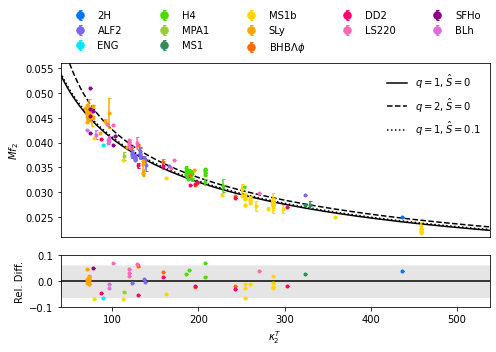

In [20]:
colordict = {
    '2B' : '#002F79',
    '2H' : '#0070FF',
    'ALF2': 'mediumslateblue',
    'ENG': '#00E8FF',
    'G2': '#00FA92',
    'G2k123': 'lightseagreen',
    'H4': '#46DD00',
    'MPA1': 'yellowgreen',
    'MS1': 'seagreen',
    'MS1b': 'gold',
    'SLy': 'orange',
    'BHBlp': '#FF6804',
    'DD2': '#FF006A',
    'LS220': 'hotpink',
    'SFHo': 'darkmagenta',
    'BLh': 'orchid',
    'BLQ': 'crimson',
    'SLy4': 'pink'
}

fig, (ax,ax2) = plt.subplots(2,1,figsize=(7,5),gridspec_kw={'height_ratios': [1, 0.3]})
ax1 = ax
plt.subplots_adjust(hspace=0)
lin1 = ax.plot(kap2t_p,prediction1,'k-',label=r'$q=1, \hat{S}=0$')
lin2 = ax.plot(kap2t_p,prediction2,'k--',label=r'$q=2, \hat{S}=0$')
lin3 = ax.plot(kap2t_p,prediction3,'k:',label=r'$q=1, \hat{S}=0.1$')
handles, labels = ax.get_legend_handles_labels()
leg1 = ax.legend(ncol=1, loc="upper right",handles=handles,labels=labels, frameon='False', fancybox='False', edgecolor='white')
ax.add_artist(leg1)
eos_list = []
for i,i_eos in enumerate(eos_fit):
    if i_eos in eos_list:
        ax1.errorbar(k2t_fit[i],f2_fit[i], yerr=ferror_fit[i], color=colordict[i_eos], fmt=".", capsize=1.5)     
    else:  
        if i_eos=='BHBlp':
            lal = r'BHB$\Lambda\phi$'
        else:
            lal = i_eos
        ax1.errorbar(k2t_fit[i],f2_fit[i], yerr=ferror_fit[i], color=colordict[i_eos], fmt=".", label=lal, capsize=1.5)
        eos_list.append(i_eos)
ax1.set_ylim([0.021,0.056])
ax1.set_xlim([40,538])   
ax1.set_ylabel(r'$Mf_2$')
for ik,kk in enumerate(k22):
    ax2.errorbar(kk,rel_res[ik], yerr=fff[ik], color=colordict[eos_fit[iq1][ik]], fmt=".", capsize=1.5)
xax = ax1.get_xaxis()
xax = xax.set_visible(False)
ax2.plot(kap2t_p,np.zeros(len(kap2t_p)), c='k')
ax2.fill_between(kap2t_p,y1=up,y2=lo,facecolor ='gray', alpha = 0.2)
ax2.set_xlim([40,538])
ax2.set_ylim([-0.1,0.1])  
ax2.set_ylabel(r'Rel. Diff.')
ax2.set_xlabel(r"$\kappa^T_2$")

handles, labels = ax1.get_legend_handles_labels()
leg2 = ax1.legend(handles=handles[3:],labels=labels[3:], bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand",ncol=5, markerscale=2.5, frameon='False', fancybox='False', edgecolor='white')
plt.tight_layout()
#plt.savefig('f2_fits.pdf')
plt.show()